# Top 50 Spotify Tracks of 2020

## Introduction
This project uses a dataset obtained from Kaggle. The data contains information about the top 50 Spodify tracks of 2020. I will perform the following tasks on this dataset: 

1. Load the data into Pandas
2. Provide basic information about the data
3. Clean the data of unnecessary, missing and duplicate data as necessary
4. Provide basic descriptive statistics
5. Deal with outlier data as necessary
6. Perform Exploratory Data Analysis (EDA)
7. Provide correlation analysis
8. Summarize my findings
9. Discuss possible further analysis

## Goals

The goal of this project is to analyze the Top 50 Spotify Tracks 2020 dataset and determine insights about its features. This analysis could be useful for a would-be artist who might be interested in placing an album or track on Spodify. It could also be useful for people who would want to gain financial benefit from marketing albums or tracks within or outside of Spodify.

For this project, I will specifically answer the following questions:

**Dataset**
1. How many observations are there in this dataset?
2. How many features this dataset has?
3. Which of the features are categorical?
4. Which of the features are numeric?

**Artists**
1. Are there any artists that have more than 1 popular track? If yes, which and how many?
2. Who was the most popular artist?
3. How many artists in total have their songs in the top 50?

**Albums**
1. Are there any albums that have more than 1 popular track? If yes, which and how many?
2. How many albums in total have their songs in the top 50?

**Tracks**
1. Which tracks have a danceability score above 0.7?
2. Which tracks have a danceability score below 0.4?
3. Which tracks have their loudness above -5?
4. Which tracks have their loudness below -8?
5. Which track is the longest?
6. Which track is the shortest?

**Genre**
1. Which genre is the most popular?
2. Which genres have just one song on the top 50?
3. How many genres in total are represented in the top 50?

**Correlations**
1. Which features are strongly positively correlated?
2. Which features are strongly negatively correlated?
3. Which features are not correlated?
4. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
5. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
6. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


# Importing Libraries and Loading Data

## Importing Libraries

I utilize the following libraries for this project:

1. pandas: Analysis of this dataset
2. numpy: Mathematical and statistical operations
3. seaborn: Graphs and diagrams
4. matplotlib: Graphs and diagrams
5. warnings: Supresses unnecessary FutureWarnings

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Loading Data in Pandas

The data is a csv file that I have dowloaded on my computer. In this section, I create a pandas dataframe object so I can work with the data.

In [159]:
top_fifty = pd.read_csv("C:\py\Projects\TuringCollege\Top50SpotifyTracks2020\spotifytoptracks.csv", index_col = 0)

# Basic Information

In this section, I display the following information about the data set:

1. The first 5 rows
2. Number or rows and columns
3. Total number of data enteries
4. Data Types

## First Five Records of the Data Set

This is a display of the first 5 rows and all columns of the data set.

In [160]:
# Configures pandas to show all columns.

pd.set_option("display.max.columns", None) 

In [161]:
top_fifty.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Number of Rows or Records 

This dataset is made of 50 rows and 16 columns.

In [162]:
top_fifty.shape

(50, 16)

## Size of the Data Set

This dataset has a total of 800 enteries.

In [61]:
top_fifty.size

800

## Data Types

This dataset is made of three data types:

- float64 (9)
- objects(5) # Pointers to string values of different lengths. 
- int64 (2)

In [163]:
top_fifty.dtypes.value_counts()

float64    9
object     5
int64      2
dtype: int64

# Data Cleaning

## NaN or Null Values

This dataset contains no missing data.

In [164]:
top_fifty.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

## Duplicate Values 

This dataset contains no duplicate values.

In [64]:
top_fifty[top_fifty.duplicated(keep = False)].sum()

artist              0.0
album               0.0
track_name          0.0
track_id            0.0
energy              0.0
danceability        0.0
key                 0.0
loudness            0.0
acousticness        0.0
speechiness         0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
genre               0.0
dtype: float64

## Deleting Unnecessary Columns

The following features are track identifiers by Spodify and are unnecessary for the purposes of this project. They will be deleted from the dataset for the purposes of this project:

1. track_id: The identification number of the track generated by Spodify.
2. key: The primary identifier for the track, generated by Spotify

In [165]:
# Deletes track_id and key columns

top_fifty = top_fifty.drop(['track_id', 'key'], axis=1)

# Descriptive Statistics

In this section, I provide basic statistical details on 10 features of this dataset:

1.  **Energy:** The values of the Energy feature range from 0 to 1. Higher value means that the songs is more energetic.
2.  **Danceability:** The values of the Danceability feature range from 0 to 1. Higher value means that it is easier to dance to the song.
3.  **Loudness:** The values of the Loudness feature are floats that typically range from -60 to 0. This feature indicates the relative loudness of the track in decibel (dB). Higher value means that the song is louder.
4.  **Accoustiness:** The values of the Accoustiness feature range from 0 to 1. This feature indicate the relative metric of the track being acoustic. Higher value means the song is more acoustic.
5.  **Speechiness:** The values of the Speechiness feature range from 0 to 1. This feature indicates the relative amount of human voice in the song.
6.  **Instrumentalness:** The values of the Instrumentalness feature range from 0 to 1. This feature describes the relative ratio of the track being instrumental. If the instrumentalness is closer to 1, the song is more likely to have no vocals.
7.  **Liveness:** The values of the Liveness feature range from 0 to 1. This feature describes the likelihood that the song was recorded with a live audience.
8.  **Valence:** The values of the Valence feature range from 0 to 1. This feature describes the positiveness of the track. Higher valence means that the song sounds more positive.
9.  **Tempo:** The values of the Tempo feature range from 50 to 200. This feature describes the tempo of the track in Beats Per Minute (BPM).
10. **Duration:** The values of the Duration feature describe the length of the track in milliseconds (ms). The range is from 140,256 to 312,820.

In [66]:
top_fifty.describe()

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


# Outliers

An outlier is an observation that is unlike the other observations. There are basically three causes for outliers:

1. Data entry and measurement errors
2. Sampling problems
3. Natural variations

Outliers can capture valuable information and excluding them has to be done with caution. In my opinion, the outliers in this dataset fit the third cause, natural variations. Even though there are values that do not fit with the pattern of the rest of the data, in my opinion, the extreme values are legitimate, and I left them in the dataset. 

I used the Interquartile Range, or IQR method to identify outliers. The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. On a box and whisker plot, Values that fall outside of these values are drawn as dots and are considred outliers.

According to the statistical methodology that I used, there are outliers in the following features:

1. Accousticness (7)
2. Danceability (3)
3. Duration (2)
4. Instrumentalness (12)
5. Liveness (3)
6. Loudness (1)
7. Speechiness (6)

In [166]:
# Ignores FutureWarning message that appears with the code below.

warnings.simplefilter(action = "ignore", category = FutureWarning) 

In [167]:
Q1 = top_fifty.quantile(0.25)
Q3 = top_fifty.quantile(0.75)
IQR = Q3 - Q1

outliers_df = (top_fifty < (Q1 - 1.5 * IQR)) | (
    top_fifty > (Q3 + 1.5 * IQR)
)

((top_fifty < (Q1 - 1.5 * IQR)) | (top_fifty > (Q3 + 1.5 * IQR))).sum()

acousticness         7
album                0
artist               0
danceability         3
duration_ms          2
energy               0
genre                0
instrumentalness    12
liveness             3
loudness             1
speechiness          6
tempo                0
track_name           0
valence              0
dtype: int64

## Outliers: Acousticness 

Acousticness has 7 outliers.

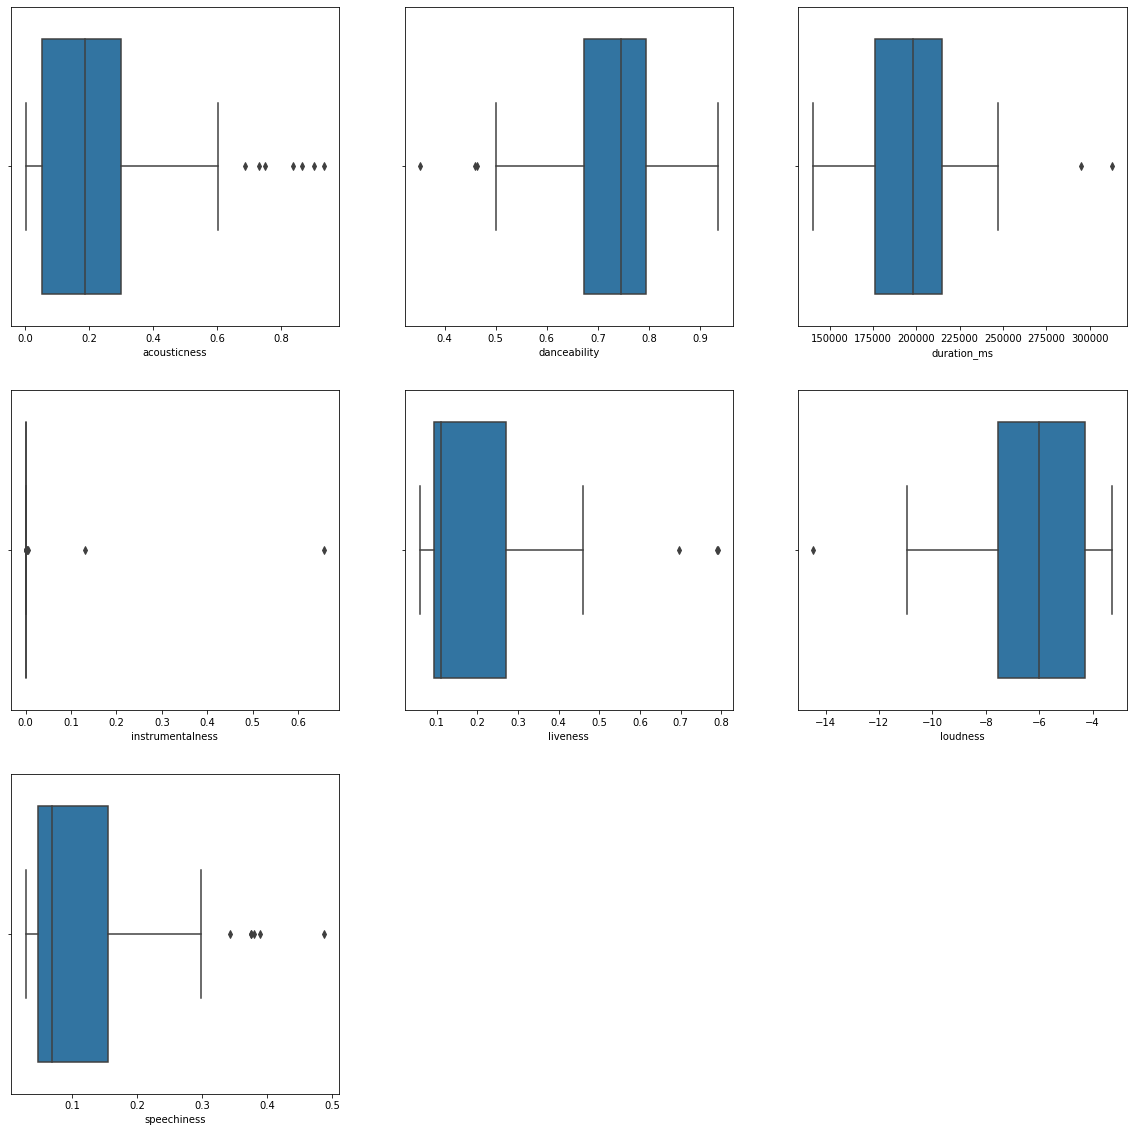

In [168]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(ax=axes[0, 0], data = top_fifty, x = top_fifty ['acousticness'])
sns.boxplot(ax=axes[0, 1], data = top_fifty, x = top_fifty ['danceability'])
sns.boxplot(ax=axes[0, 2], data = top_fifty, x = top_fifty ['duration_ms'])
sns.boxplot(ax=axes[1, 0], data = top_fifty, x = top_fifty ['instrumentalness'])
sns.boxplot(ax=axes[1, 1], data = top_fifty, x = top_fifty ['liveness'])
sns.boxplot(ax=axes[1, 2], data = top_fifty, x = top_fifty ['loudness'])
sns.boxplot(ax=axes[2, 0], data = top_fifty, x = top_fifty ['speechiness'])

fig.delaxes(ax = axes[2,1]) 
fig.delaxes(ax = axes[2,2]) 

# Exploratory Data Analysis (EDA)

## Artists

In this section, I will answer the following questions:

1. How many artists in total have their songs in the top 50?
2. Who was the most popular artist?
3. Are there any artists that have more than 1 popular track? If yes, which and how many?

### How many artists in total have their songs in the top 50?

Forty (40)

In [169]:
artists = top_fifty['artist']
unique_artists = artists.drop_duplicates(keep = 'first')
unique_artists.count()

40

### Who were the most popular artists?

I determined the most popular artists by the number of tracks an artist has in the Spodify Top 50. The most popular artists are:
- Travis Scott (3 tracks)
- Billie Eilish (3 tracks)
- Dua Lipa (3 tracks)

In [170]:
dups_artist = top_fifty.pivot_table(index = ['artist'], aggfunc ='size')
dups_artist.sort_values(ascending = False).head(3)

artist
Travis Scott     3
Billie Eilish    3
Dua Lipa         3
dtype: int64

### Are there any artists that have more than 1 popular track? If yes, which and how many?

The following artists have more than one popular track:

In [80]:
dups_artist = top_fifty.pivot_table(index = ['artist'], aggfunc ='size')
dups_artist.sort_values(ascending = False).iloc[0:7]

artist
Travis Scott     3
Billie Eilish    3
Dua Lipa         3
Justin Bieber    2
Post Malone      2
Harry Styles     2
Lewis Capaldi    2
dtype: int64

## Albums

In this section, I will answer the following questions:

1. How many albums in total have their songs in the top 50?
2. Are there any albums that have more than 1 popular track? If yes, which and how many? 

### How many albums in total have their songs in the top 50?

Forty-Five (45)

In [171]:
dups_albums = top_fifty.pivot_table(index = ['album'], aggfunc ='size')

In [172]:
dups_albums.sort_values(ascending = False)
dups_albums.sort_values(ascending = False).count()

45

### Are there any albums that have more than 1 popular track? If yes, which and how many? 

The following albums have more than one popular songs:
- Future Nostalgia(3)
- Fine Line(2)
- Hollywood's Bleeding(2)
- Changes(2)

In [173]:
dups_albums.sort_values(ascending = False).iloc[0:4]

album
Future Nostalgia        3
Fine Line               2
Hollywood's Bleeding    2
Changes                 2
dtype: int64

## Duration

In this section, I will answer the following questions:

1. Which track is the longest?
2. Which track is the shortest?

In [174]:
duration = top_fifty[['track_name','album','duration_ms']] # Creates a new data frame from the original.
duration.set_index('track_name', inplace = True) # Sets the track_name as the index.

### Which track is the longest?

The track with the longest duration:
- SICKO MODE from the ablum, ASTROWORLD with 312820 ms.

In [175]:
duration_ascending = duration.sort_values(by='duration_ms', ascending = False) # Sorts the data frame based on duration_ms column

duration_ascending.iloc[[0]]

,album,duration_ms
track_name,,
SICKO MODE,ASTROWORLD,312820


### Which track is the shortest?

Track with the shortest duration:
- Mood (feat. iann dior) from album, Mood (feat. iann dior) with 140526 ms

In [176]:
duration_descending = duration.sort_values(by = 'duration_ms', ascending = True) # Sorts the data frame based on duration_ms column

duration_descending.iloc[[0]]

,album,duration_ms
track_name,,
Mood (feat. iann dior),Mood (feat. iann dior),140526


## Genres

In this section, I will answer the following questions:

1. How many genres in total are represented in the top 50?
2. Which genre is the most popular?
3. Which genres have just one song on the top 50?

In [177]:
# Creates a new data frame from the original.
# genre.set_index('genre', inplace = True) # Sets the track_name as the index.
# genre_ascending = genre.sort_values(by = 'genre') # Sorts the data frame by genre.

genre = top_fifty[['genre']] 

### How many genres in total are represented in the top 50?

There are 16 unique genres in the Top 50.

In [178]:
genre.nunique()

genre    16
dtype: int64

### Which genre is the most popular?

Pop is the most popular genre in the Top 50.

In [90]:
genre.value_counts()

genre                             
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
 Electro-pop                           2
R&B/Soul                               2
Alternative/reggaeton/experimental     1
Chamber pop                            1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
dtype: int64

### Which genres have just one song on the top 50?

The following 10 genres have just one track in the Top 50.

In [179]:
num_tracks = genre.value_counts() == 1
one_song = num_tracks [num_tracks == True]  # Shows only rows with True values.

one_song

genre                             
Alternative/reggaeton/experimental    True
Chamber pop                           True
Dance-pop/Disco                       True
Disco-pop                             True
Dreampop/Hip-Hop/R&B                  True
Hip-Hop/Trap                          True
Nu-disco                              True
Pop rap                               True
Pop/Soft Rock                         True
R&B/Hip-Hop alternative               True
dtype: bool

## Danceability

In this section, I will answer the following questions:

1. Which tracks have a danceability score above 0.7?
2. Which tracks have a danceability score below 0.4?

In [180]:
danceability = top_fifty[['track_name','album','danceability']] # Creates a new data frame from the original.
danceability.set_index('track_name', inplace = True) # Sets the track_name as the index.

### Which tracks have a danceability score above 0.7?

The following 32 tracks have danceability scores above 0.7.

In [181]:
danceability_bool = danceability['danceability'] > 0.7
danceability_high = danceability_bool [danceability_bool == True]  # Shows only rows with True values.

danceability_high

track_name
Dance Monkey                                     True
The Box                                          True
Roses - Imanbek Remix                            True
Don't Start Now                                  True
ROCKSTAR (feat. Roddy Ricch)                     True
death bed (coffee for your head)                 True
Falling                                          True
Tusa                                             True
Blueberry Faygo                                  True
Intentions (feat. Quavo)                         True
Toosie Slide                                     True
Say So                                           True
Memories                                         True
Life Is Good (feat. Drake)                       True
Savage Love (Laxed - Siren Beat)                 True
Breaking Me                                      True
everything i wanted                              True
Señorita                                         True
bad guy          

### Which tracks have a danceability score below 0.4?

There is 1 track with danceability score below 0.4: lovely (with Khalid) 

In [182]:
danceability_bool_low = danceability['danceability'] < 0.4
danceability_low = danceability_bool_low[danceability_bool_low == True]

danceability_low

track_name
lovely (with Khalid)    True
Name: danceability, dtype: bool

## Loudness

In this section, I will answer the following questions:

1. Which tracks have their loudness above -5?
2. Which tracks have their loudness below -8?

In [183]:
loudness = top_fifty[['track_name','album','loudness']] # Creates a new data frame from the original.
loudness.set_index('track_name', inplace = True) # Sets the track_name as the index.

### Which tracks have their loudness above -5?

There are 19 tracks with loudness scores above -5. They are listed below.

In [184]:
loudness_bool_high = loudness['loudness'] > -5
loudness_high = loudness_bool_high[loudness_bool_high == True]

loudness_high

track_name
Don't Start Now                                  True
Watermelon Sugar                                 True
Tusa                                             True
Circles                                          True
Before You Go                                    True
Say So                                           True
Adore You                                        True
Mood (feat. iann dior)                           True
Break My Heart                                   True
Dynamite                                         True
Supalonely (feat. Gus Dapperton)                 True
Rain On Me (with Ariana Grande)                  True
Sunflower - Spider-Man: Into the Spider-Verse    True
Hawái                                            True
Ride It                                          True
goosebumps                                       True
Safaera                                          True
Physical                                         True
SICKO MODE       

In [185]:
loudness_high.shape[0]

19

### Which tracks have their loudness below -8?

There are 9 tracks with loudness scores below -8. They are listed below.

In [186]:
loudness_bool_low = loudness['loudness'] < -8
loudness_low = loudness_bool_low[loudness_bool_low == True]

loudness_low

track_name
death bed (coffee for your head)                  True
Falling                                           True
Toosie Slide                                      True
Savage Love (Laxed - Siren Beat)                  True
everything i wanted                               True
bad guy                                           True
HIGHEST IN THE ROOM                               True
lovely (with Khalid)                              True
If the World Was Ending - feat. Julia Michaels    True
Name: loudness, dtype: bool

In [187]:
loudness_low.shape[0]

9

## Correlations

In this section, I will answer the following questions:

1. Which features are strongly positively correlated?
2. Which features are strongly negatively correlated?
3. Which features are not correlated?
4. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
5. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
6. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

The Result of the corr() method is a table with numbers that represents how well the relationship is between two columns. The numbers variy from -1 to 1. 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

For the purposes of this analysis, I chose the following thresholds:

- Negative 0.7 to Positive 1: Positive correlation.

- Negative 0.6 to Positive + 0.2: Negative correlation.

-  0.0 to Positive 0.2: No correlation.

In [102]:
# Converts genre labels to numberical 

top_fifty['genre'] = top_fifty['genre'].astype('category').cat.codes

top_fifty.head()

,artist,album,track_name,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,15
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,1
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,8
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,5
4,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,10


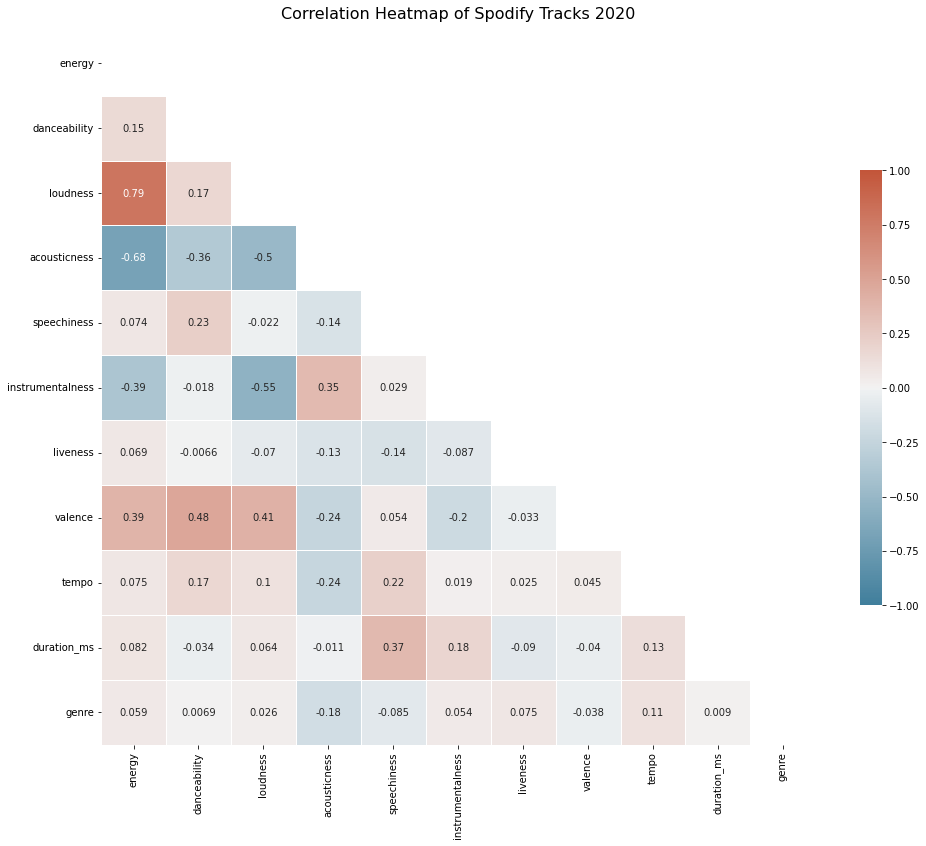

In [106]:
corr = top_fifty.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (16, 16))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

heatmap.set_title(
    "Correlation Heatmap of Spodify Tracks 2020",
    fontdict={"fontsize": 16},
    pad=12,
)
plt.xlabel("")
plt.ylabel("");

### Which features are strongly positively correlated?

Loudness and Energy (+0.79)

### Which features are strongly negatively correlated?

Enegry and Acoustiness (-0.68)

### Which features are not correlated?

1. Energy and Genre (0.059)
2. Energy and Duration (0.082)
3. Energy and Tempo (0.075)
4. Energy and Liveness (0.069)
5. Energy and Speechiness (0.074)
6. Danceability and Genre (0.0069)
7. Danceability and Aliveness (-0.0066)
8. Danceability and Instrumentalness (-0.018)
9. Loudness and Speechiness (0.022)
10. Loudness and Liveness (-0.07)
11. Speechiness and Valence (0.054)
12. Speechiness and Instrumentalness (0.029)
13. Instrumentalness and Genre (0.054)
14. Instrumentalness and Tempo (0.019)
15. Instrumentalness and Liveness (-0.087)
16. Liveness and Duration (0.09)
17. Liveness and Valence (0.033)
18. Liveness and Tempo(0.025)
19. Duration and Genre (0.009)

### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [188]:
top_fifty = pd.read_csv("C:\py\Projects\TuringCollege\Top50SpotifyTracks2020\spotifytoptracks.csv", index_col = 0)

Danceability score compares positively with the following genres:
Danceability score 

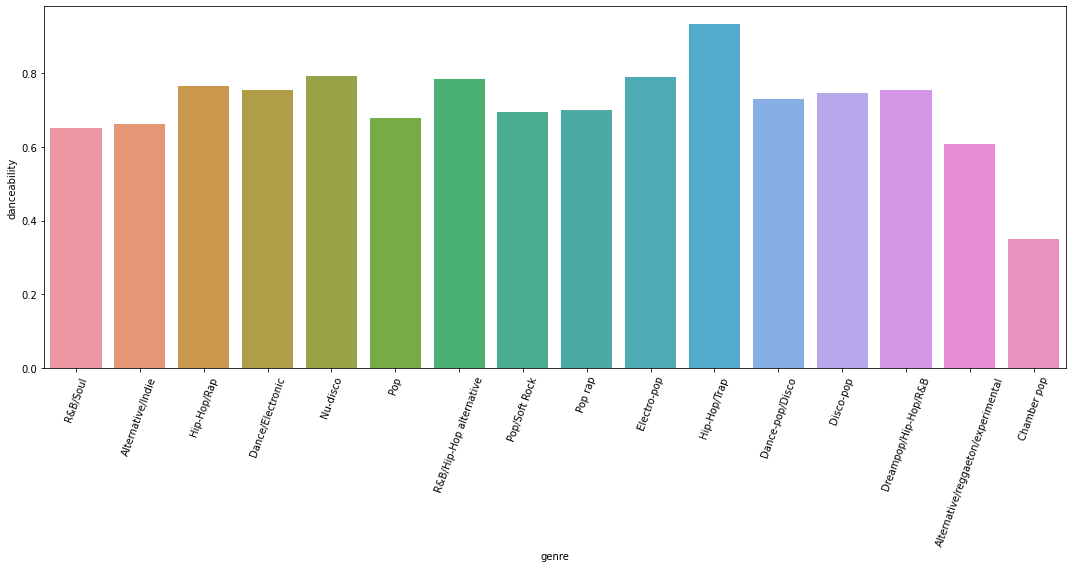

In [153]:
plt.figure(figsize=(15,8))

sns.barplot(x='genre', y = 'danceability', data = top_fifty, ci = None)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

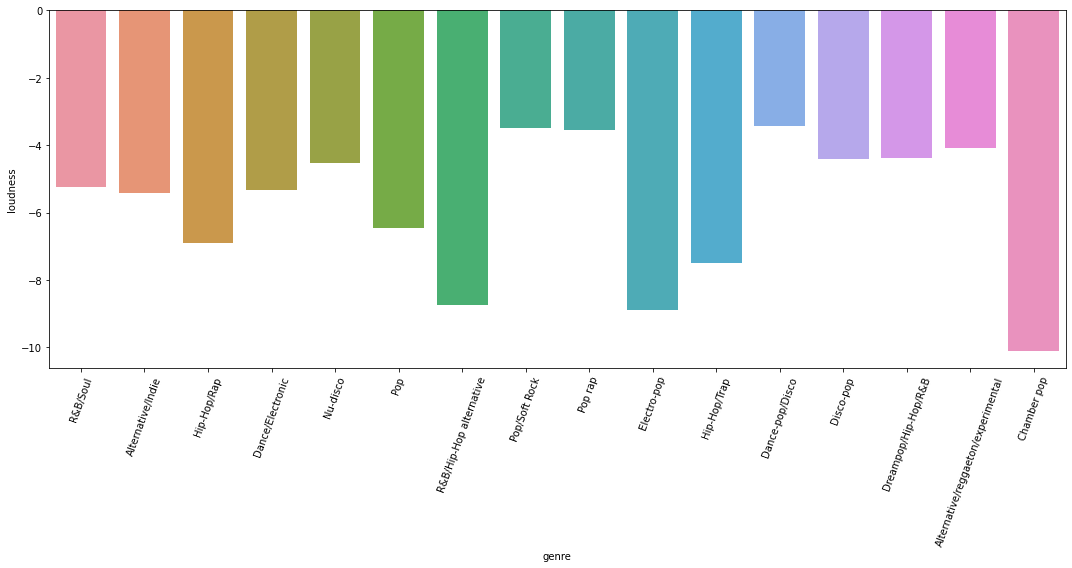

In [154]:
plt.figure(figsize=(15,8))

sns.barplot(x='genre', y = 'loudness', data = top_fifty, ci = None)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

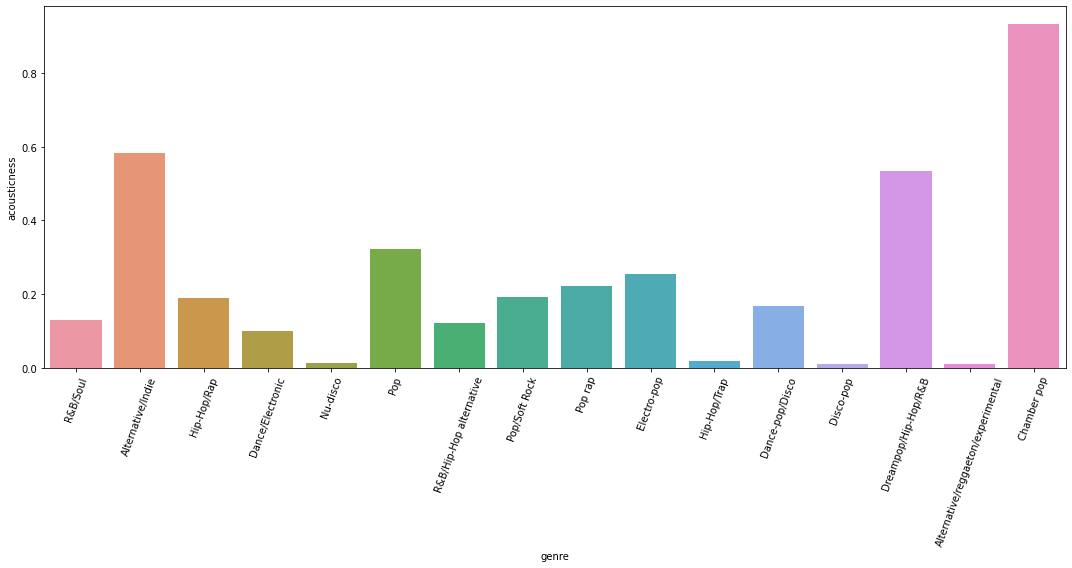

In [155]:
plt.figure(figsize=(15,8))

sns.barplot(x='genre', y = 'acousticness', data = top_fifty, ci = None)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# Conclusions

In this project, I analyzed the Top 50 Spotify Tracks 2020 dataset and gained various insights about its features. By looking at the analysis in this project, one will gain insights into characteristics of popular tracks and on considerations in creating or marketing a popular track on Spodify. This analysis would be useful for an artist who might be interested in creating artistic work for Spodify. It could also be useful for entrepreneurs who want to gain financial benefit from marketing albums or tracks within or outside of Spodify.

# Suggestions

This analysis could be improved by doing more detailed analysis on each of the features of this dataset. In addition, more knowledge about each feature of this dataset could improve the analysis. Furthermore, this analysis could be improved by focusing on one specific feature and identifying key ideas that could be useful in answering more specific questions.